# State forecasting

In [1]:
import sys
print(sys.version)
print(sys.executable)
print(sys.path)

3.8.5 (default, Sep  5 2020, 10:50:12) 
[GCC 10.2.0]
/usr/bin/python3
['/home/hboekema/Documents/Jobs/T-DAB/DS 2020 Exercise/notebooks', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/hboekema/.local/lib/python3.8/site-packages', '/usr/lib/python3.8/site-packages', '/usr/lib/python3.8/site-packages/IPython/extensions', '/home/hboekema/.ipython']


In [2]:
sys.path.append("..")

In [3]:
import numpy as np
import pandas as pd
import matplotlib
%notebook matplotlib
import matplotlib.pyplot as plt

In [4]:
from src.DataLoader import DataLoader
from src.preprocessing import split_dataframe_into_time_sequences, order_dataframe_by_datetime, time_sequences_to_tack_segregated_sequences

In [5]:
# Load data
dataframe = DataLoader().load_dataframe_from_datapath()
print(dataframe)
print(dataframe.dtypes)

        CurrentSpeed  CurrentDir   TWS   TWA        AWS   AWA       Roll  \
0             0.0756       123.0  10.8  48.0  10.400000  48.0  -3.540000   
1             0.0756       123.0  10.8  48.0  10.400000  48.0  -3.540000   
2             0.0756       123.0  10.8  48.0  10.400000  48.0  -3.520000   
3             0.0756       123.0  10.8  48.0  10.400000  48.0  -3.520000   
4             0.0756       123.0  10.8  48.0  10.400000  48.0  -3.500000   
...              ...         ...   ...   ...        ...   ...        ...   
219995        1.7496       103.0  14.6  56.0  21.100000  33.0 -16.440001   
219996        1.7496       101.0  14.7  58.0  20.500000  37.0 -17.980000   
219997        1.8576       100.0  14.5  60.0  20.299999  37.0 -17.660000   
219998        1.8522       103.0  15.2  57.0  22.100000  35.0 -18.559999   
219999        1.8090       104.0  14.9  57.0  21.400000  33.0 -17.039999   

           Pitch  HeadingMag    HoG  ...     VMG  RudderAng  Leeway    TWD  \
0       9

In [6]:
# Drop rows with values missing
complete_dataframe = dataframe.dropna().reset_index(drop=True)

# Sequence information

In [7]:
#ordered_dataframe = order_dataframe_by_datetime(complete_dataframe)
#print(ordered_dataframe)

In [8]:
time_sequences = split_dataframe_into_time_sequences(complete_dataframe)

In [9]:
print(time_sequences)

[    CurrentSpeed  CurrentDir   TWS   TWA   AWS   AWA  Roll     Pitch  \
0         0.0756       123.0  10.8  48.0  10.4  48.0 -3.54  9.080000   
1         0.0756       123.0  10.8  48.0  10.4  48.0 -3.54  9.080000   
2         0.0756       123.0  10.8  48.0  10.4  48.0 -3.52  9.099999   
3         0.0756       123.0  10.8  48.0  10.4  48.0 -3.52  9.099999   
4         0.0756       123.0  10.8  48.0  10.4  48.0 -3.50  9.099999   
5         0.0756       123.0  10.8  48.0  10.4  48.0 -3.50  9.099999   
6         0.0756       123.0  10.8  48.0  10.4  48.0 -3.46  9.120000   
7         0.0756       123.0  10.8  48.0  10.4  48.0 -3.46  9.120000   
8         0.0756       123.0  10.8  48.0  10.4  48.0 -3.46  9.120000   
9         0.0756       123.0  10.8  48.0  10.4  48.0 -3.42  9.139999   
10        0.0756       123.0  10.8  48.0  10.4  48.0 -3.42  9.139999   
11        0.0756       123.0  10.8  48.0  10.4  48.0 -3.40  9.139999   
12        0.0756       123.0  10.8  48.0  10.4  48.0 -3.40  9.1

In [10]:
def print_sequences_metadata(sequences):
    print("Number of complete sequences in dataset: %d" % len(sequences))
    sequence_lengths = [len(seq.index) for seq in sequences]
    print("Mean sequence length: %.02f" % np.mean(sequence_lengths))
    print("Min sequence length: %d" % np.min(sequence_lengths))
    print("Max sequence length: %d" % np.max(sequence_lengths))
    print("Std. dev. of sequence length: %.02f" % np.std(sequence_lengths))

In [11]:
print_sequences_metadata(time_sequences)

Number of complete sequences in dataset: 179
Mean sequence length: 1227.26
Min sequence length: 14
Max sequence length: 11652
Std. dev. of sequence length: 1417.10


In [12]:
tack_segregated_sequences = time_sequences_to_tack_segregated_sequences(time_sequences)

In [13]:
print_sequences_metadata(tack_segregated_sequences)

Number of complete sequences in dataset: 192
Mean sequence length: 1144.17
Min sequence length: 14
Max sequence length: 11652
Std. dev. of sequence length: 1360.60


# Autocorrelation of sequences

Tacking: 0
CurrentSpeed


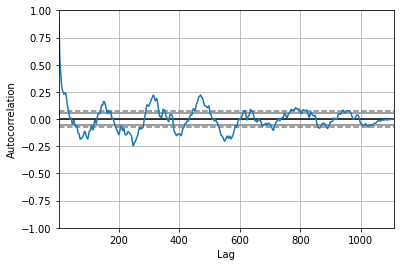

CurrentDir


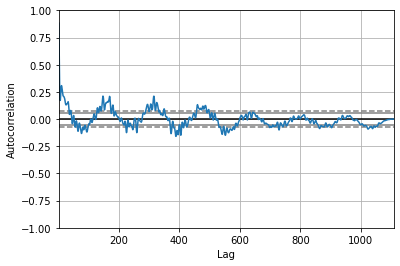

TWS


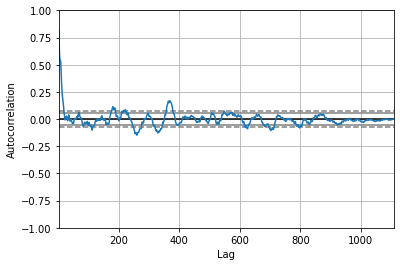

TWA


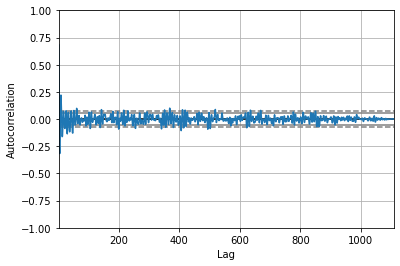

AWS


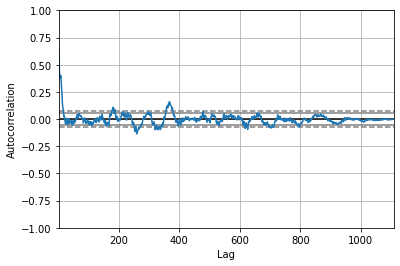

AWA


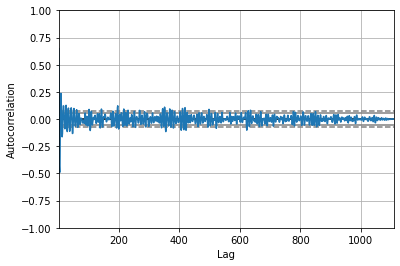

Roll


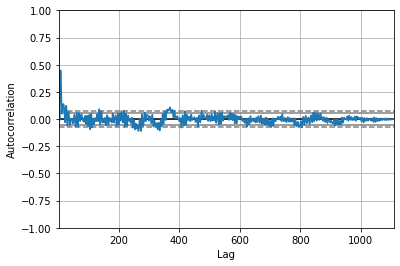

Pitch


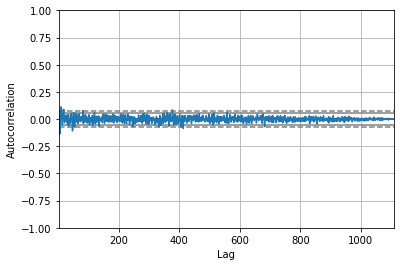

HeadingMag


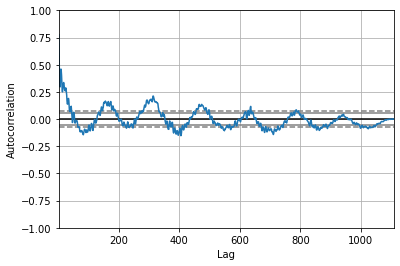

HoG


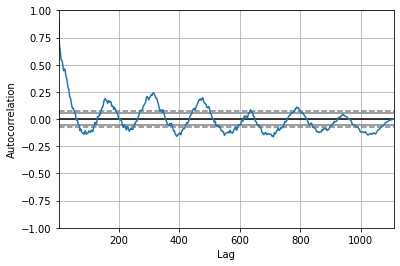

HeadingTrue


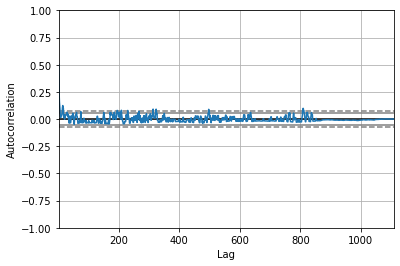

AirTemp


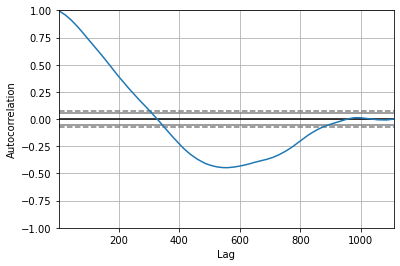

Longitude


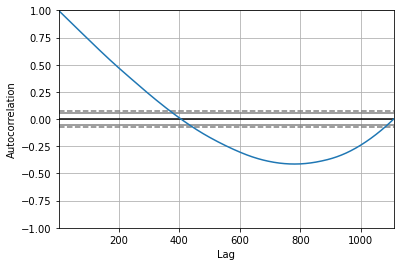

Latitude


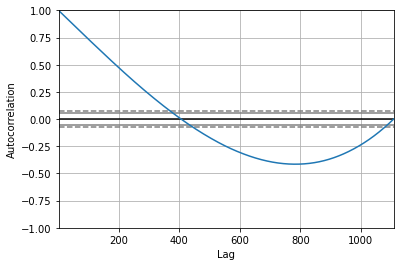

SoG


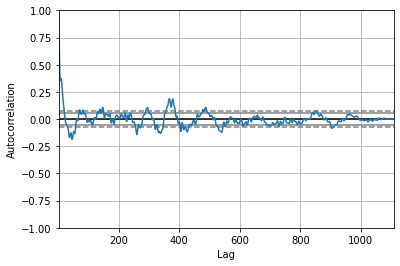

SoS


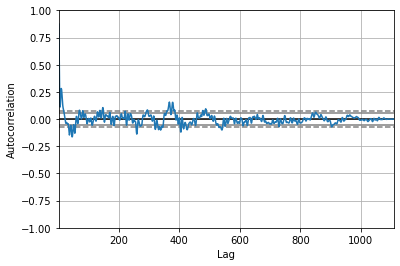

AvgSoS


/home/hboekema/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


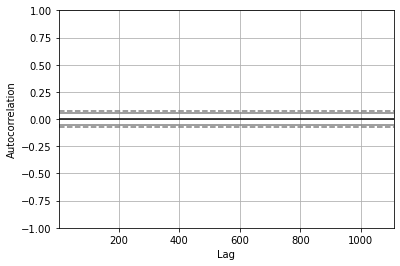

VMG


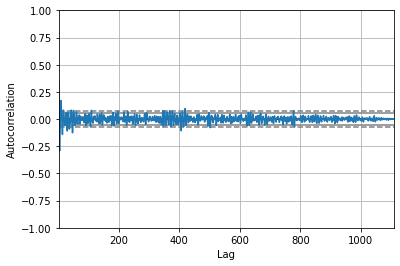

RudderAng


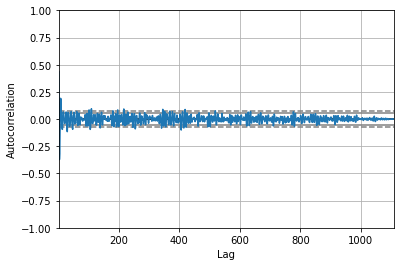

Leeway


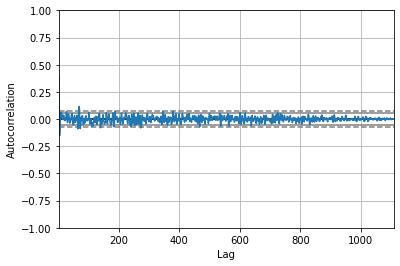

TWD


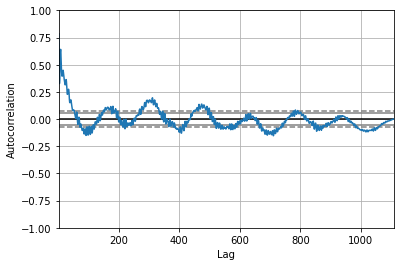

WSoG


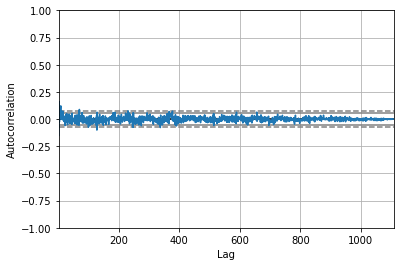

VoltageDrawn


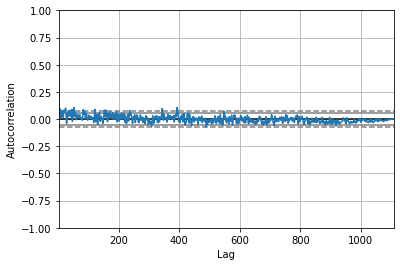

ModePilote


/home/hboekema/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


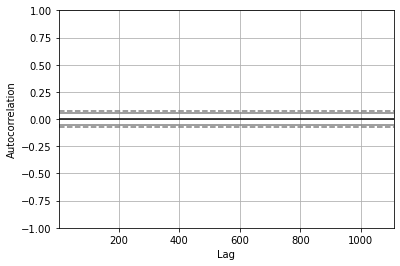

Yaw


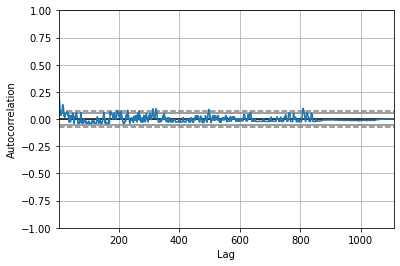

Tacking


/home/hboekema/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:416: RuntimeWarning: invalid value encountered in double_scalars
  return ((data[: n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0


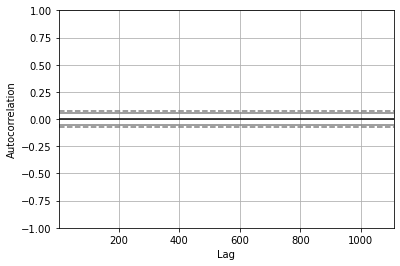

In [69]:
s1 = tack_segregated_sequences[-1].drop("DateTime", axis=1)
print("Tacking: %d" % s1["Tacking"][0])
for column in s1.columns:
    print(column)
    pd.plotting.autocorrelation_plot(s1[column])
    plt.show()

# Stationarity

In [80]:
from statsmodels.tsa.stattools import adfuller

In [81]:
s1_rolling_mean = s1.rolling(5).mean()

CurrentSpeed


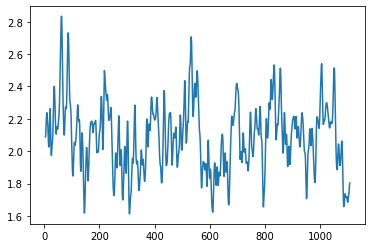

CurrentDir


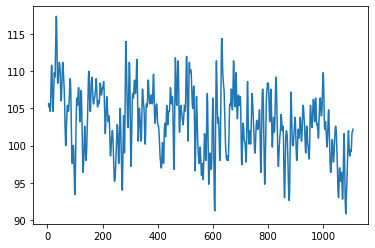

TWS


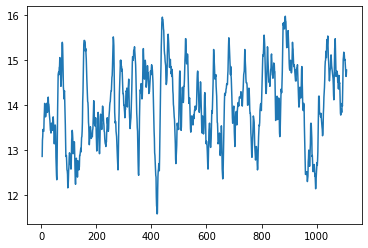

TWA


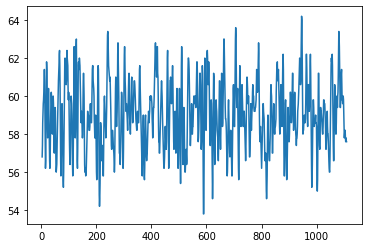

AWS


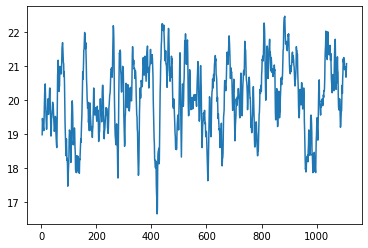

AWA


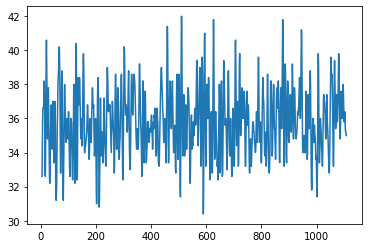

Roll


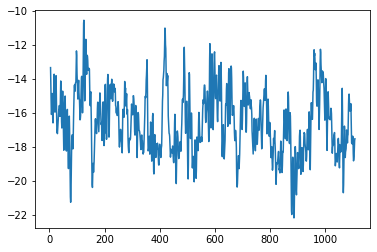

Pitch


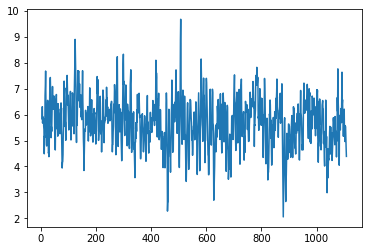

HeadingMag


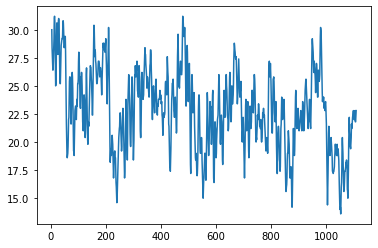

HoG


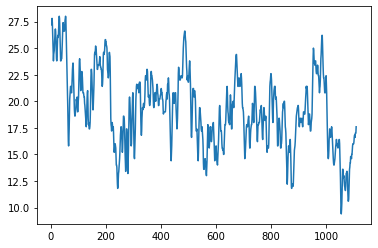

HeadingTrue


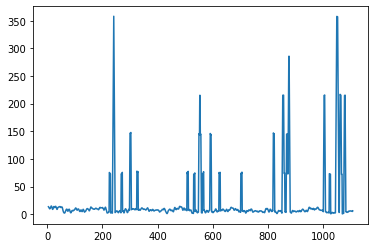

AirTemp


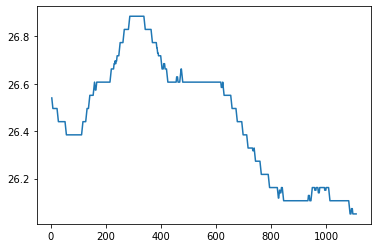

Longitude


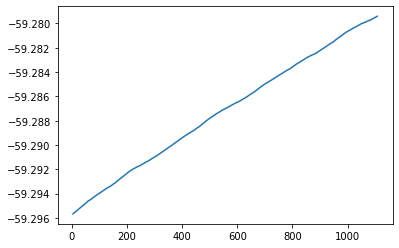

Latitude


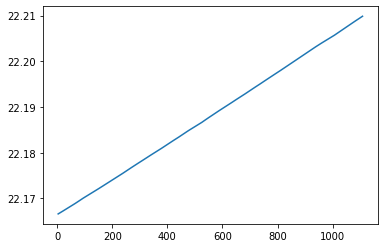

SoG


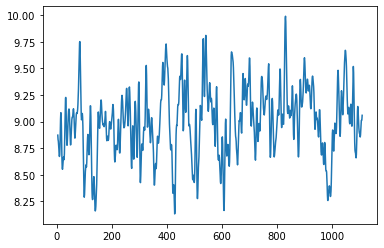

SoS


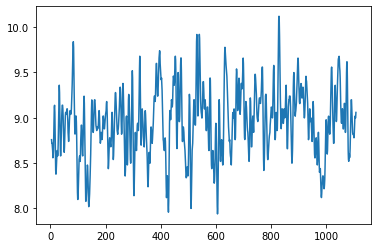

AvgSoS


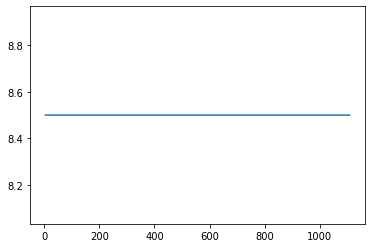

VMG


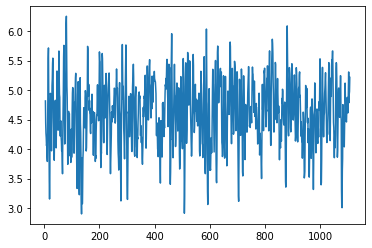

RudderAng


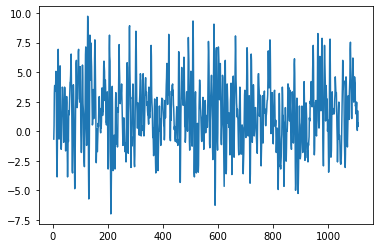

Leeway


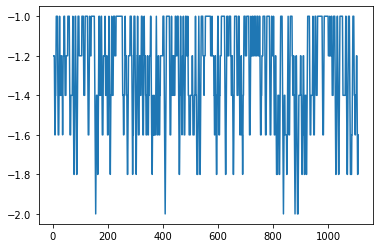

TWD


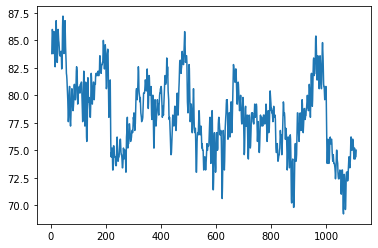

WSoG


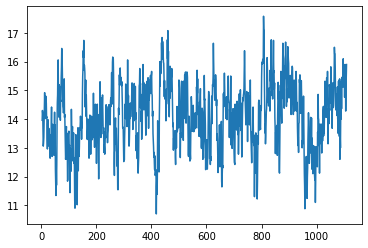

VoltageDrawn


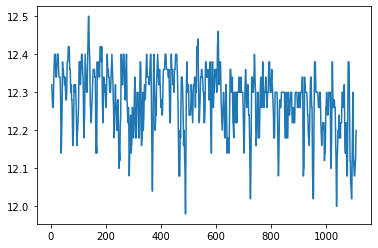

ModePilote


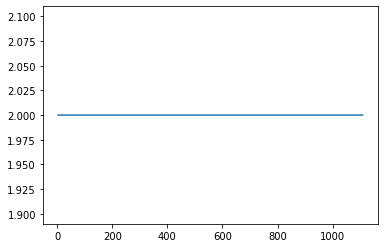

Yaw


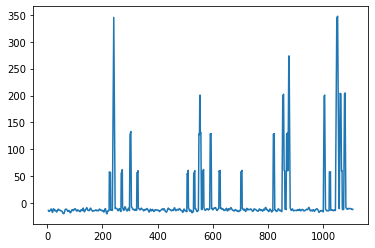

Tacking


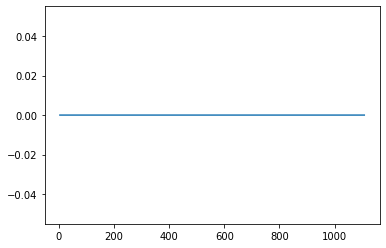

In [82]:
for column in s1_rolling_mean.columns:
    print(column)
    s1_rolling_mean[column].plot()
    plt.show()

In [83]:
s1_stationary = s1 - s1_rolling_mean

CurrentSpeed
(-11.796319434062736, 9.560328828464617e-22, 14, 1090, {'1%': -3.4363635475753824, '5%': -2.864195245967465, '10%': -2.5681837404258903}, -3739.362869254095)


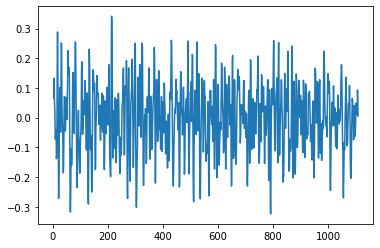

CurrentDir
(-13.180556806602011, 1.19847595191377e-24, 12, 1092, {'1%': -3.436352507699052, '5%': -2.86419037625175, '10%': -2.56818114683546}, 4041.5409753117565)


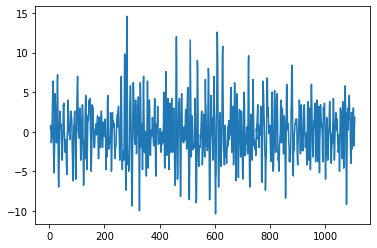

TWS
(-10.169052649087874, 7.169881555899412e-18, 21, 1083, {'1%': -3.436402509014354, '5%': -2.8642124318084456, '10%': -2.568192893555997}, 1265.3345188071808)


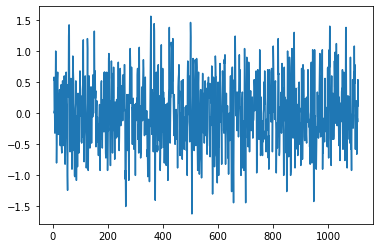

TWA
(-11.545420509620806, 3.5508891970928356e-21, 21, 1083, {'1%': -3.436402509014354, '5%': -2.8642124318084456, '10%': -2.568192893555997}, 3780.6938101512455)


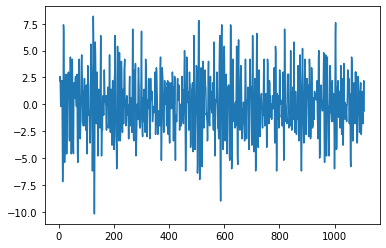

AWS
(-23.615674200620628, 0.0, 3, 1101, {'1%': -3.4363033257654716, '5%': -2.864168681767248, '10%': -2.568169592476825}, 2575.501773197684)


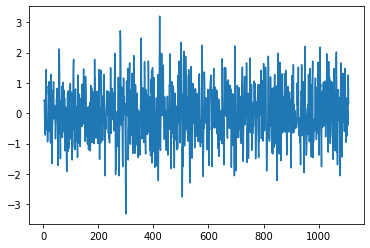

AWA
(-12.69997447400568, 1.085231595309804e-23, 22, 1082, {'1%': -3.4364081161854747, '5%': -2.8642149051061954, '10%': -2.5681942108302214}, 3979.0589151261756)


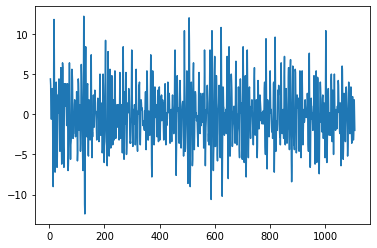

Roll
(-10.91609101088923, 1.0666346611291036e-19, 14, 1090, {'1%': -3.4363635475753824, '5%': -2.864195245967465, '10%': -2.5681837404258903}, 3548.154334876504)


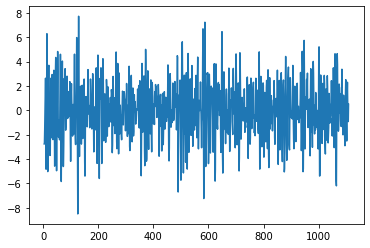

Pitch
(-15.511833805184027, 2.3431844417760897e-28, 12, 1092, {'1%': -3.436352507699052, '5%': -2.86419037625175, '10%': -2.56818114683546}, 4361.877014525735)


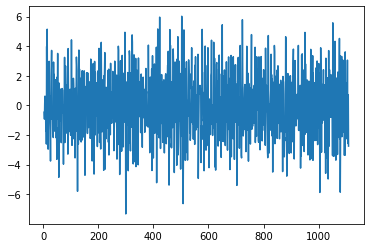

HeadingMag
(-12.117560190145394, 1.857242227234052e-22, 14, 1090, {'1%': -3.4363635475753824, '5%': -2.864195245967465, '10%': -2.5681837404258903}, 4661.477766458271)


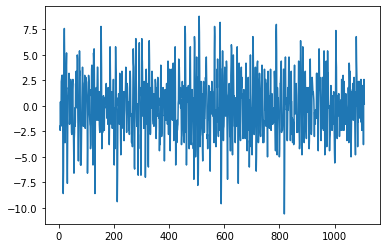

HoG
(-11.205967104916104, 2.184474186088413e-20, 16, 1088, {'1%': -3.4363746281360426, '5%': -2.864200133611212, '10%': -2.568186343567528}, 3499.9170475974097)


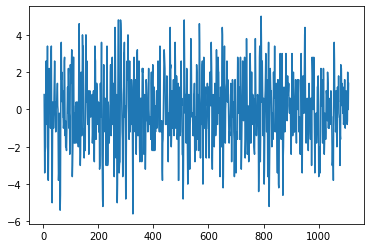

HeadingTrue
(-11.545041457172626, 3.558007966656289e-21, 19, 1085, {'1%': -3.436391325753478, '5%': -2.864207498909067, '10%': -2.5681902663042324}, 11662.658038036338)


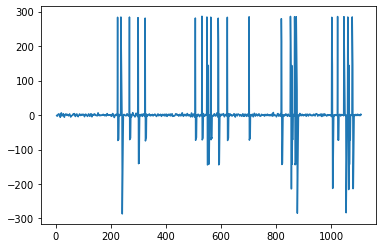

AirTemp
(-4.395651902374379, 0.000302136428843232, 22, 1082, {'1%': -3.4364081161854747, '5%': -2.8642149051061954, '10%': -2.5681942108302214}, -6872.946457372522)


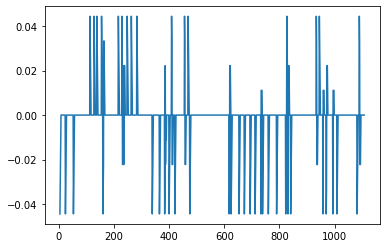

Longitude
(-5.329673354288382, 4.7516165518541226e-06, 9, 1095, {'1%': -3.436336023678866, '5%': -2.8641831050780513, '10%': -2.568177274243656}, -24300.26380406363)


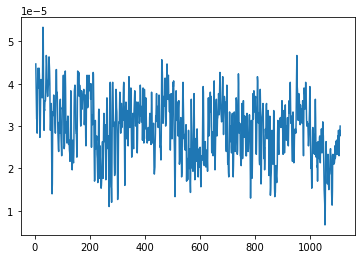

Latitude
(-6.5571941218210625, 8.557797520947718e-09, 6, 1098, {'1%': -3.436319629947604, '5%': -2.8641758736917784, '10%': -2.56817342284863}, -25749.61552955438)


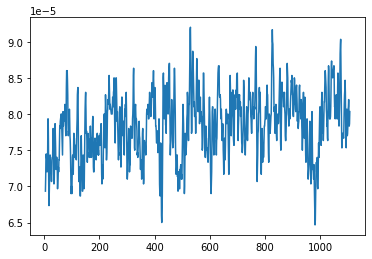

SoG
(-13.494714423709619, 3.057754983975319e-25, 7, 1097, {'1%': -3.436325084538422, '5%': -2.8641782797532214, '10%': -2.5681747043025274}, -2642.644877915538)


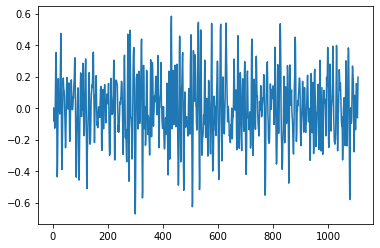

SoS
(-11.458583572231944, 5.626952612787319e-21, 12, 1092, {'1%': -3.436352507699052, '5%': -2.86419037625175, '10%': -2.56818114683546}, -1323.7926576176114)


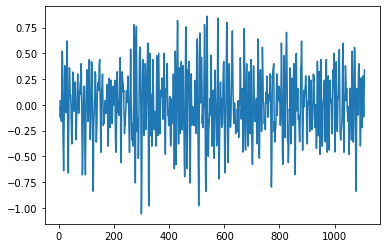

AvgSoS
(nan, nan, 0, 1104, {'1%': -3.436287110400734, '5%': -2.864161528982321, '10%': -2.5681657829565743}, -inf)


/home/hboekema/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


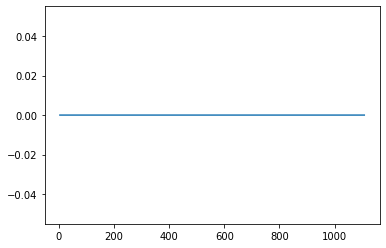

VMG
(-11.404574955181518, 7.504099997093055e-21, 21, 1083, {'1%': -3.436402509014354, '5%': -2.8642124318084456, '10%': -2.568192893555997}, 2737.8138168873247)


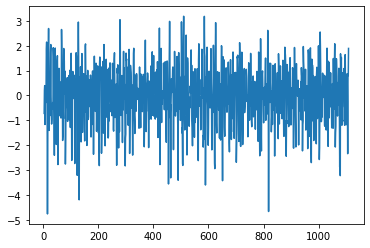

RudderAng
(-11.663271921372411, 1.910678004460073e-21, 22, 1082, {'1%': -3.4364081161854747, '5%': -2.8642149051061954, '10%': -2.5681942108302214}, 6048.138749654761)


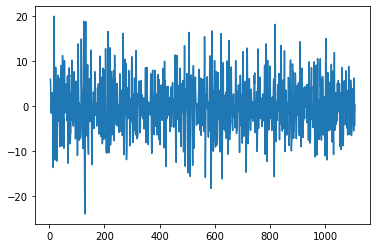

Leeway
(-11.424892438060414, 6.732951134247688e-21, 22, 1082, {'1%': -3.4364081161854747, '5%': -2.8642149051061954, '10%': -2.5681942108302214}, 710.1616785338763)


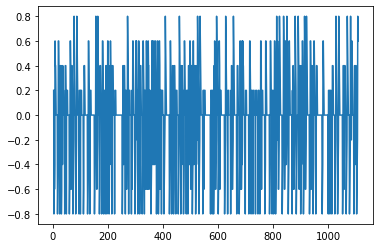

TWD
(-22.3265933388631, 0.0, 5, 1099, {'1%': -3.4363141853066232, '5%': -2.864173472014944, '10%': -2.568172143730631}, 4166.375271332372)


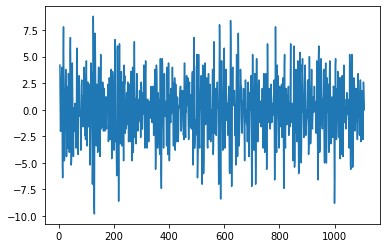

WSoG
(-12.985814417763901, 2.8799655312257548e-24, 12, 1092, {'1%': -3.436352507699052, '5%': -2.86419037625175, '10%': -2.56818114683546}, 4601.5711077989945)


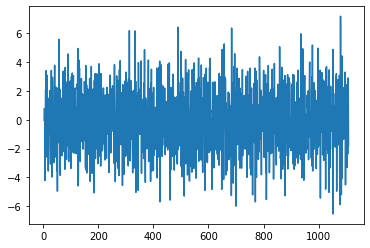

VoltageDrawn
(-12.489083150312926, 2.9731153094268116e-23, 20, 1084, {'1%': -3.436396912213269, '5%': -2.864209963080287, '10%': -2.5681915787162484}, -2186.3821997645327)


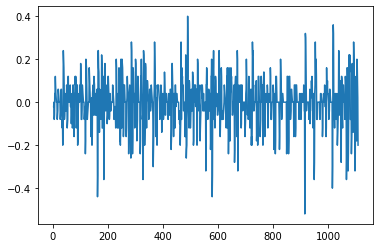

ModePilote
(nan, nan, 0, 1104, {'1%': -3.436287110400734, '5%': -2.864161528982321, '10%': -2.5681657829565743}, -inf)


/home/hboekema/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


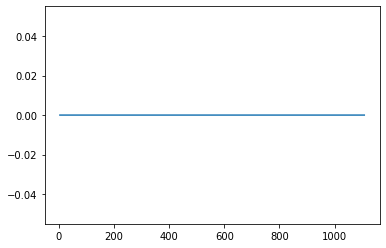

Yaw
(-11.488024753045895, 4.812113656981505e-21, 19, 1085, {'1%': -3.436391325753478, '5%': -2.864207498909067, '10%': -2.5681902663042324}, 11668.963076733384)


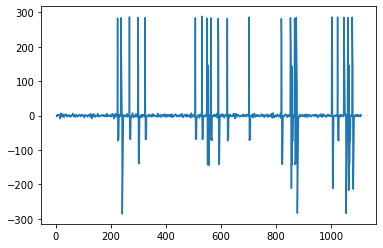

Tacking
(nan, nan, 0, 1104, {'1%': -3.436287110400734, '5%': -2.864161528982321, '10%': -2.5681657829565743}, -inf)


/home/hboekema/.local/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


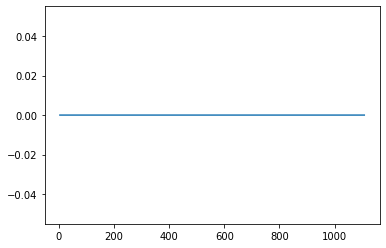

In [84]:
for column in s1_stationary.columns:
    print(column)
    print(adfuller(s1_stationary[column].dropna()))
    s1_stationary[column].plot()
    plt.show()

Rejection of the null hypothesis means that it is safe to assume stationarity, allowing us to apply AR models to the data.